In [16]:
%matplotlib inline
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [17]:
def db(m1, m2, s1, s2):
    A = 1/(2*s1**2) - 1/(2*s2**2)
    B = m2/(s2**2) - m1/(s1**2)
    C = (m1**2)/(2*s1**2) - (m2**2)/(2*s2**2) + np.log(s1/s2)
    return np.roots([A, B, C])

In [18]:
u1 = 3
u2 = 7
s1 = 3
s2 = 2
db(u1, u2, s1, s2)

array([15.57389036,  4.82610964])

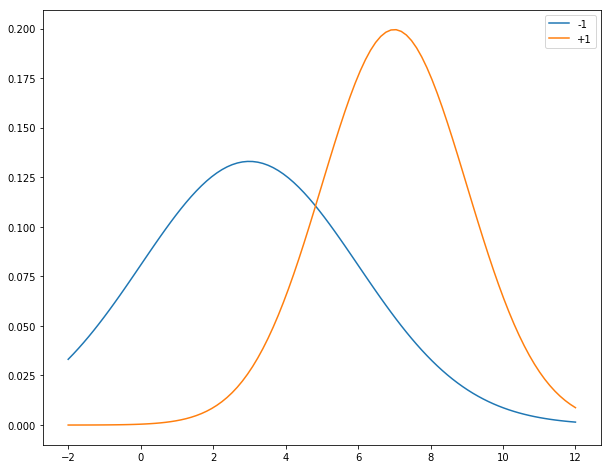

In [19]:
x = np.linspace(-2, 12, 100)
plt.plot(x, norm.pdf(x, loc = u1, scale = s1), label="-1")
plt.plot(x, norm.pdf(x, loc = u2, scale = s2), label = "+1")
plt.legend()

# Query Synthesis

In [27]:
eps = 1e-2
xn = [-2]
xp = [12]
mn = np.mean(xn)
mp = np.mean(xp)
sn = np.std(xn) + eps
sp = np.std(xp) + eps
t = 6

In [28]:
db(mn, mp, sn, sp)

array([5.])

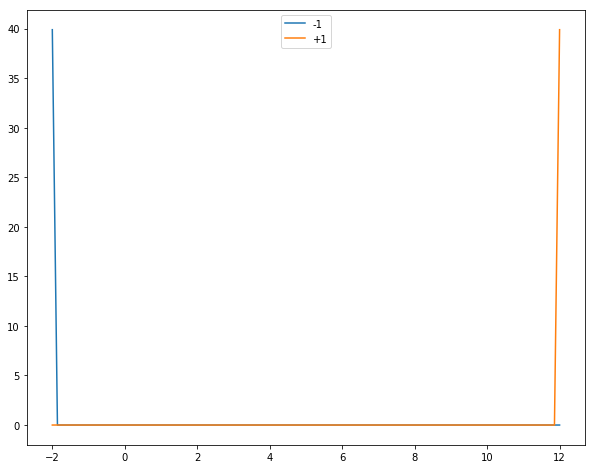

In [29]:
plt.plot(x, norm.pdf(x, loc = mn, scale = sn), label="-1")
plt.plot(x, norm.pdf(x, loc = mp, scale = sp), label="+1")
plt.legend()

In [30]:
def update_data(t, verbose=True, eps = 1e-2):
    global xn, xp, mn, mp, sp, sn
    q = db(mn, mp, sn, sp)
    pdfs = norm.pdf(q, loc=mn, scale=sn)
    i = np.argmax(pdfs)
    q_ = q[i]
    if q_ < t:
        xn.append(q_)
    else:
        xp.append(q_)
    
    mn = np.mean(xn)
    mp = np.mean(xp)
    sn = np.std(xn) + eps
    sp = np.std(xp) + eps
    
    if verbose:
        print("Queried: %0.3f" %q_)
        print("Negative data points: [%s]" % ", ".join(["%0.3f" % x for x in sorted(xn)]))
        print("Positive data points: [%s]" %", ".join(["%0.3f" % x for x in sorted(xp)]))
        print("Negative class: mu: %0.3f sigma: %0.3f" %(mn, sn))
        print("Positive class: mu: %0.3f sigma: %0.3f" %(mp, sp))

In [31]:
update_data(t)

Queried: 5.000
Negative data points: [-2.000, 5.000]
Positive data points: [12.000]
Negative class: mu: 1.500 sigma: 3.510
Positive class: mu: 12.000 sigma: 0.010


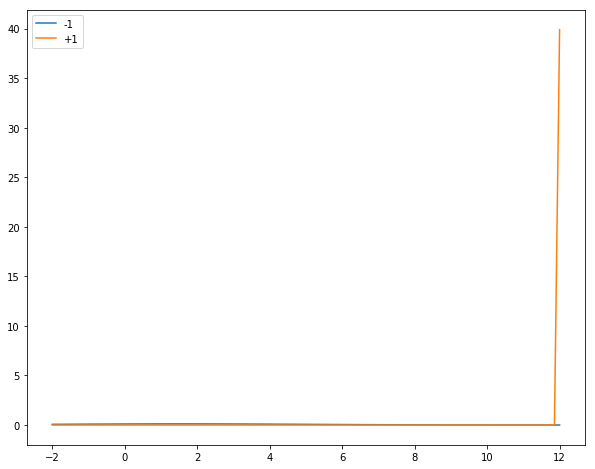

In [32]:
plt.plot(x, norm.pdf(x, loc = mn, scale = sn), label="-1")
plt.plot(x, norm.pdf(x, loc = mp, scale = sp), label="+1")
plt.legend()

In [33]:
update_data(t)

Queried: 11.955
Negative data points: [-2.000, 5.000]
Positive data points: [11.955, 12.000]
Negative class: mu: 1.500 sigma: 3.510
Positive class: mu: 11.977 sigma: 0.033


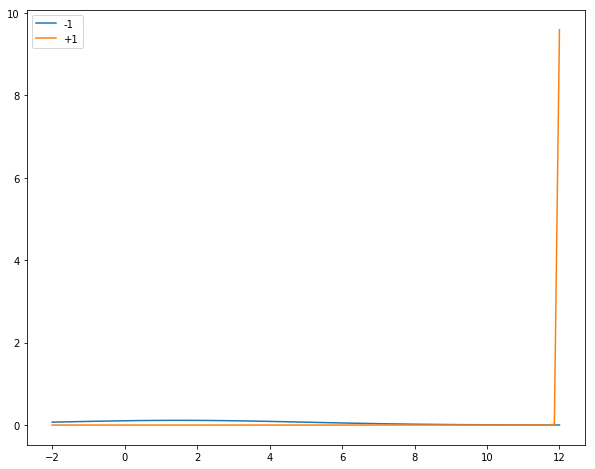

In [34]:
plt.plot(x, norm.pdf(x, loc = mn, scale = sn), label="-1")
plt.plot(x, norm.pdf(x, loc = mp, scale = sp), label="+1")
plt.legend()

In [35]:
update_data(t)

Queried: 11.839
Negative data points: [-2.000, 5.000]
Positive data points: [11.839, 11.955, 12.000]
Negative class: mu: 1.500 sigma: 3.510
Positive class: mu: 11.931 sigma: 0.078


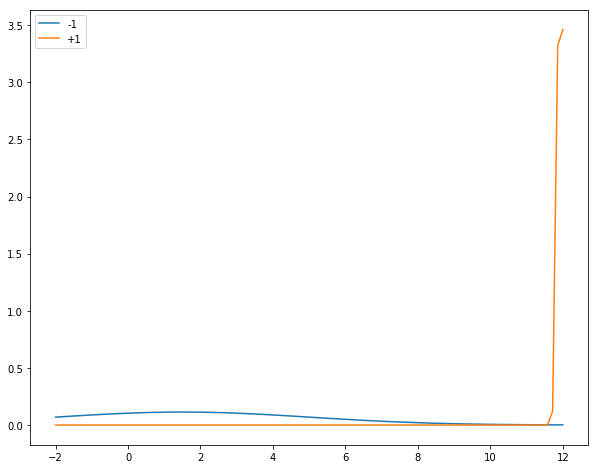

In [36]:
plt.plot(x, norm.pdf(x, loc = mn, scale = sn), label="-1")
plt.plot(x, norm.pdf(x, loc = mp, scale = sp), label="+1")
plt.legend()

In [37]:
update_data(t)

Queried: 11.620
Negative data points: [-2.000, 5.000]
Positive data points: [11.620, 11.839, 11.955, 12.000]
Negative class: mu: 1.500 sigma: 3.510
Positive class: mu: 11.853 sigma: 0.157


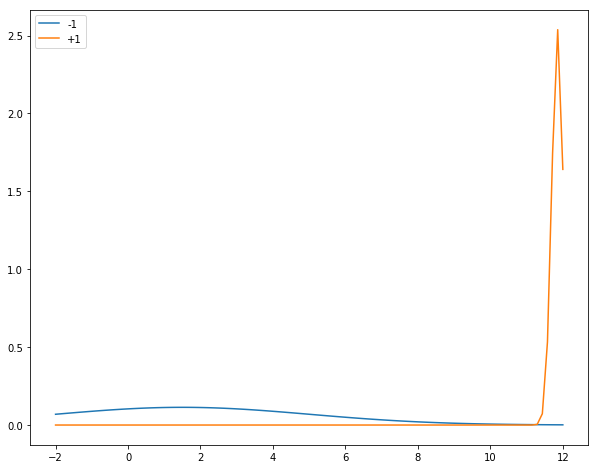

In [38]:
plt.plot(x, norm.pdf(x, loc = mn, scale = sn), label="-1")
plt.plot(x, norm.pdf(x, loc = mp, scale = sp), label="+1")
plt.legend()

In [39]:
update_data(t)

Queried: 11.266
Negative data points: [-2.000, 5.000]
Positive data points: [11.266, 11.620, 11.839, 11.955, 12.000]
Negative class: mu: 1.500 sigma: 3.510
Positive class: mu: 11.736 sigma: 0.279


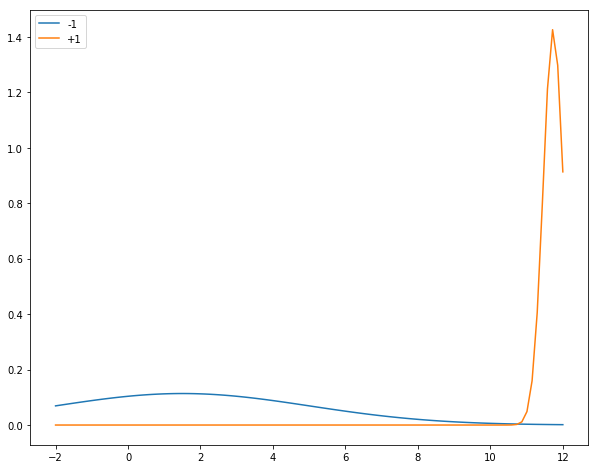

In [40]:
plt.plot(x, norm.pdf(x, loc = mn, scale = sn), label="-1")
plt.plot(x, norm.pdf(x, loc = mp, scale = sp), label="+1")
plt.legend()

In [41]:
update_data(t)

Queried: 10.768
Negative data points: [-2.000, 5.000]
Positive data points: [10.768, 11.266, 11.620, 11.839, 11.955, 12.000]
Negative class: mu: 1.500 sigma: 3.510
Positive class: mu: 11.574 sigma: 0.447


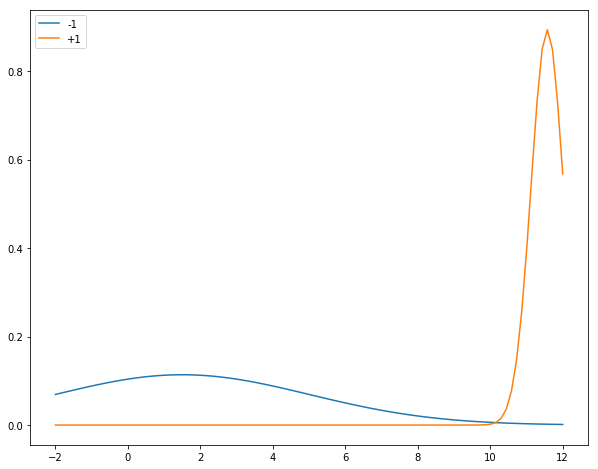

In [42]:
plt.plot(x, norm.pdf(x, loc = mn, scale = sn), label="-1")
plt.plot(x, norm.pdf(x, loc = mp, scale = sp), label="+1")
plt.legend()

In [43]:
update_data(t)

Queried: 10.149
Negative data points: [-2.000, 5.000]
Positive data points: [10.149, 10.768, 11.266, 11.620, 11.839, 11.955, 12.000]
Negative class: mu: 1.500 sigma: 3.510
Positive class: mu: 11.371 sigma: 0.652


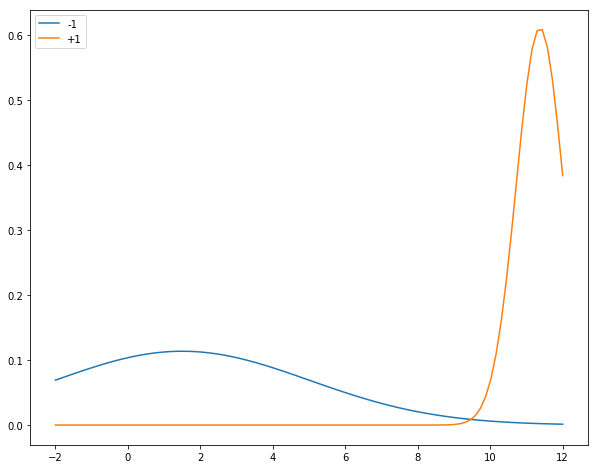

In [44]:
plt.plot(x, norm.pdf(x, loc = mn, scale = sn), label="-1")
plt.plot(x, norm.pdf(x, loc = mp, scale = sp), label="+1")
plt.legend()

In [45]:
update_data(t)

Queried: 9.468
Negative data points: [-2.000, 5.000]
Positive data points: [9.468, 10.149, 10.768, 11.266, 11.620, 11.839, 11.955, 12.000]
Negative class: mu: 1.500 sigma: 3.510
Positive class: mu: 11.133 sigma: 0.880


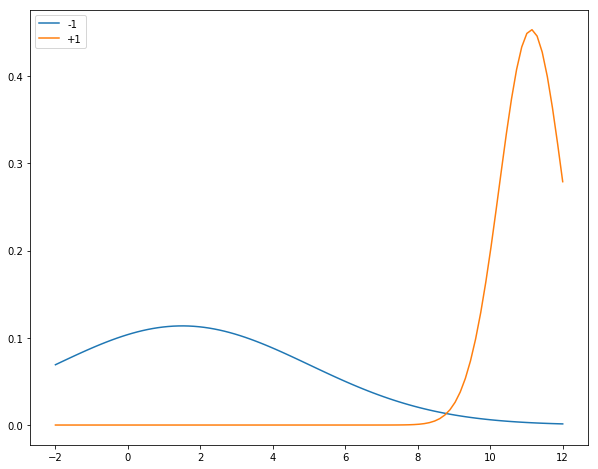

In [46]:
plt.plot(x, norm.pdf(x, loc = mn, scale = sn), label="-1")
plt.plot(x, norm.pdf(x, loc = mp, scale = sp), label="+1")
plt.legend()

In [47]:
for _ in range(10):
   update_data(t)

Queried: 8.791
Negative data points: [-2.000, 5.000]
Positive data points: [8.791, 9.468, 10.149, 10.768, 11.266, 11.620, 11.839, 11.955, 12.000]
Negative class: mu: 1.500 sigma: 3.510
Positive class: mu: 10.873 sigma: 1.112
Queried: 8.170
Negative data points: [-2.000, 5.000]
Positive data points: [8.170, 8.791, 9.468, 10.149, 10.768, 11.266, 11.620, 11.839, 11.955, 12.000]
Negative class: mu: 1.500 sigma: 3.510
Positive class: mu: 10.602 sigma: 1.333
Queried: 7.627
Negative data points: [-2.000, 5.000]
Positive data points: [7.627, 8.170, 8.791, 9.468, 10.149, 10.768, 11.266, 11.620, 11.839, 11.955, 12.000]
Negative class: mu: 1.500 sigma: 3.510
Positive class: mu: 10.332 sigma: 1.534
Queried: 7.165
Negative data points: [-2.000, 5.000]
Positive data points: [7.165, 7.627, 8.170, 8.791, 9.468, 10.149, 10.768, 11.266, 11.620, 11.839, 11.955, 12.000]
Negative class: mu: 1.500 sigma: 3.510
Positive class: mu: 10.068 sigma: 1.712
Queried: 6.777
Negative data points: [-2.000, 5.000]
Posit

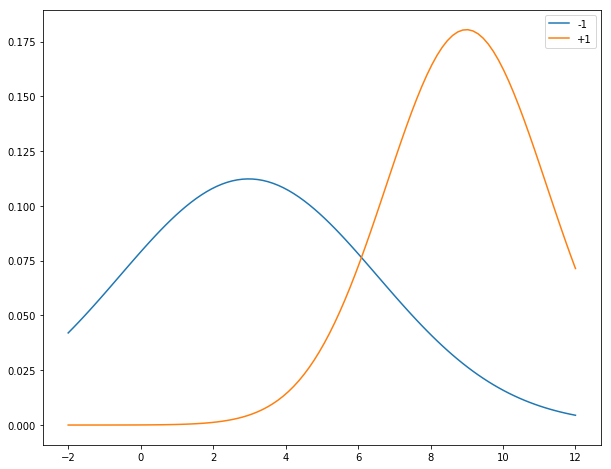

In [48]:
plt.plot(x, norm.pdf(x, loc = mn, scale = sn), label="-1")
plt.plot(x, norm.pdf(x, loc = mp, scale = sp), label="+1")
plt.legend()

In [49]:
for _ in range(10):
   update_data(t)

Queried: 6.094
Negative data points: [-2.000, 5.000, 5.937]
Positive data points: [6.094, 6.174, 6.235, 6.391, 6.450, 6.777, 7.165, 7.627, 8.170, 8.791, 9.468, 10.149, 10.768, 11.266, 11.620, 11.839, 11.955, 12.000]
Negative class: mu: 2.979 sigma: 3.551
Positive class: mu: 8.830 sigma: 2.249
Queried: 5.966
Negative data points: [-2.000, 5.000, 5.937, 5.966]
Positive data points: [6.094, 6.174, 6.235, 6.391, 6.450, 6.777, 7.165, 7.627, 8.170, 8.791, 9.468, 10.149, 10.768, 11.266, 11.620, 11.839, 11.955, 12.000]
Negative class: mu: 3.726 sigma: 3.339
Positive class: mu: 8.830 sigma: 2.249
Queried: 6.219
Negative data points: [-2.000, 5.000, 5.937, 5.966]
Positive data points: [6.094, 6.174, 6.219, 6.235, 6.391, 6.450, 6.777, 7.165, 7.627, 8.170, 8.791, 9.468, 10.149, 10.768, 11.266, 11.620, 11.839, 11.955, 12.000]
Negative class: mu: 3.726 sigma: 3.339
Positive class: mu: 8.692 sigma: 2.266
Queried: 6.120
Negative data points: [-2.000, 5.000, 5.937, 5.966]
Positive data points: [6.094, 

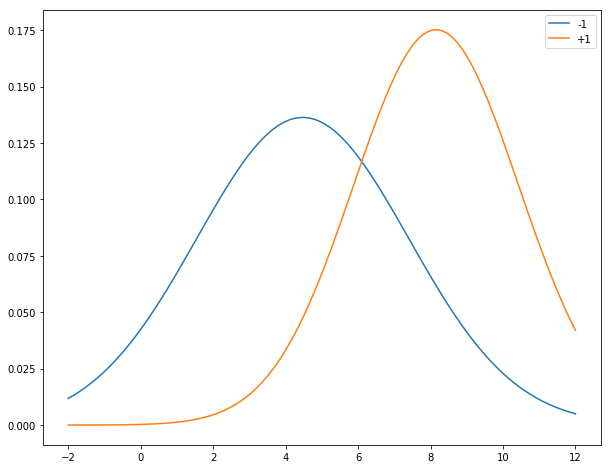

In [50]:
plt.plot(x, norm.pdf(x, loc = mn, scale = sn), label="-1")
plt.plot(x, norm.pdf(x, loc = mp, scale = sp), label="+1")
plt.legend()

In [51]:
for _ in range(100):
   update_data(t,  verbose=False)

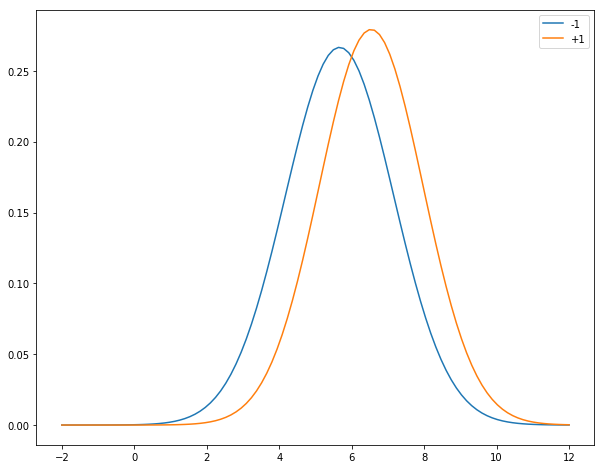

In [52]:
plt.plot(x, norm.pdf(x, loc = mn, scale = sn), label="-1")
plt.plot(x, norm.pdf(x, loc = mp, scale = sp), label="+1")
plt.legend()

In [53]:
db(mn, mp, sn, sp)

array([25.02948846,  5.99796735])

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 26.]),
 array([-2.        , -1.20005606, -0.40011212,  0.39983182,  1.19977576,
         1.9997197 ,  2.79966365,  3.59960759,  4.39955153,  5.19949547,
         5.99943941]),
 <a list of 10 Patch objects>)

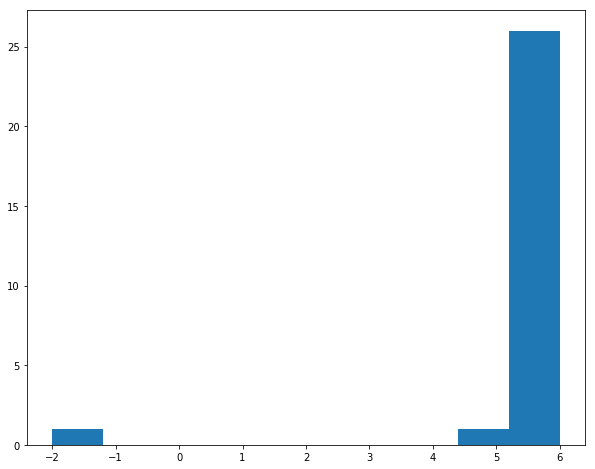

In [54]:
plt.hist(xn)

(array([89.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  4.]),
 array([ 6.00138096,  6.60124286,  7.20110477,  7.80096667,  8.40082857,
         9.00069048,  9.60055238, 10.20041429, 10.80027619, 11.4001381 ,
        12.        ]),
 <a list of 10 Patch objects>)

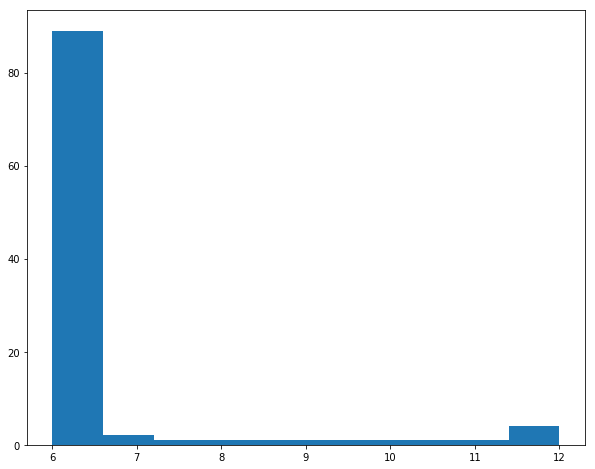

In [55]:
plt.hist(xp)

# Pool-based Sampling

In [56]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

In [57]:
twenty = fetch_20newsgroups(subset='all', categories=['comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware'])
corp = twenty.data
y = twenty.target

In [58]:
vect = CountVectorizer(lowercase=True, ngram_range=(1, 1), min_df=5, binary=True)

In [59]:
X = vect.fit_transform(corp)
X.shape

(1967, 6622)

In [60]:
X_pool, X_test, y_pool, y_test = train_test_split(X, y, random_state=42, test_size=1/3)

In [61]:
X_pool.shape

(1311, 6622)

In [62]:
rand = np.random.RandomState(42)

In [63]:
candidates = list(rand.permutation(X_pool.shape[0]))

In [64]:
train_indices = []
# label until one of each class is in the train set
for i in range(len(candidates)):
    train_indices.append(candidates[i])
    if len(np.unique(y_pool[train_indices])) == 2:
        candidates = candidates[i+1:]
        break

In [65]:
len(train_indices)

2

In [66]:
y_pool[train_indices]

array([0, 1], dtype=int64)

In [67]:
# All pool as train
clf = LogisticRegression(solver='liblinear')
clf.fit(X_pool, y_pool)
clf.score(X_test, y_test)

0.9024390243902439

In [68]:
# Initial data
clf.fit(X_pool[train_indices], y_pool[train_indices])
initial_accu = clf.score(X_test, y_test)
initial_accu

0.5396341463414634

In [69]:
budget = 200

## Random Sampling

In [70]:
rs_cands = candidates.copy()
rs_tis = train_indices.copy()

In [71]:
rs_accu = [initial_accu]
for i in range(budget):
    c = rand.randint(len(rs_cands))
    rs_tis.append(rs_cands[c])
    rs_cands = rs_cands[:c] + rs_cands[c+1:]
    clf = LogisticRegression(solver='liblinear')
    clf.fit(X_pool[rs_tis], y_pool[rs_tis])
    accu = clf.score(X_test, y_test) 
    #print("%0.3f" %accu)
    rs_accu.append(accu)

## Uncertainty Sampling

In [72]:
unc_cands = candidates.copy()
unc_tis = train_indices.copy()

In [73]:
unc_accu = [initial_accu]

clf = LogisticRegression(solver='liblinear')
clf.fit(X_pool[unc_tis], y_pool[unc_tis])

for i in range(budget):
    probs = clf.predict_proba(X_pool[unc_cands])
    c = np.argmin(np.max(probs, axis=1))
    unc_tis.append(unc_cands[c])
    unc_cands = unc_cands[:c] + unc_cands[c+1:]
    clf = LogisticRegression(solver='liblinear')
    clf.fit(X_pool[unc_tis], y_pool[unc_tis])
    accu = clf.score(X_test, y_test) 
    #print("%0.3f" %accu)
    unc_accu.append(accu)

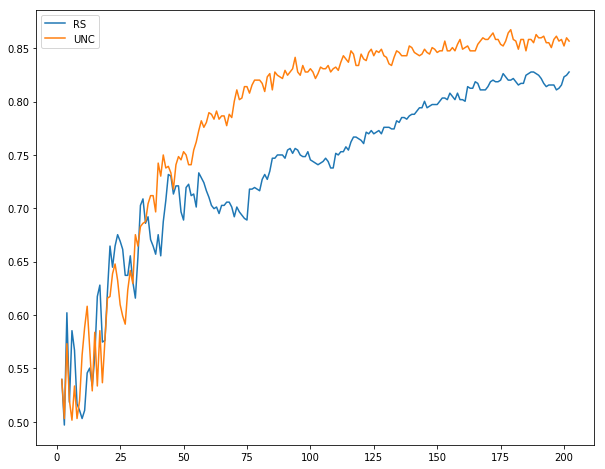

In [74]:
plt.plot(range(len(train_indices), len(rs_tis)+1), rs_accu, label="RS")
plt.plot(range(len(train_indices), len(unc_tis)+1), unc_accu, label="UNC")
plt.legend()

## Query-by-bagging

In [75]:
from sklearn.ensemble import BaggingClassifier

In [77]:
bag_cands = candidates.copy()
bag_tis = train_indices.copy()

In [78]:
bag_accu = [initial_accu]
for i in range(budget):
    base_clf = LogisticRegression(solver='liblinear')
    bag_clf = BaggingClassifier(base_estimator=base_clf, max_samples=1.0, max_features=0.50, bootstrap=False, bootstrap_features=False)
    bag_clf.fit(X_pool[bag_tis], y_pool[bag_tis])
    probs = bag_clf.predict_proba(X_pool[bag_cands])
    c = np.argmin(np.max(probs, axis=1))
    bag_tis.append(bag_cands[c])
    bag_cands = bag_cands[:c] + bag_cands[c+1:]
    clf = LogisticRegression(solver='liblinear')
    clf.fit(X_pool[bag_tis], y_pool[bag_tis])
    accu = clf.score(X_test, y_test) 
    #print("%0.3f" %accu)
    bag_accu.append(accu)

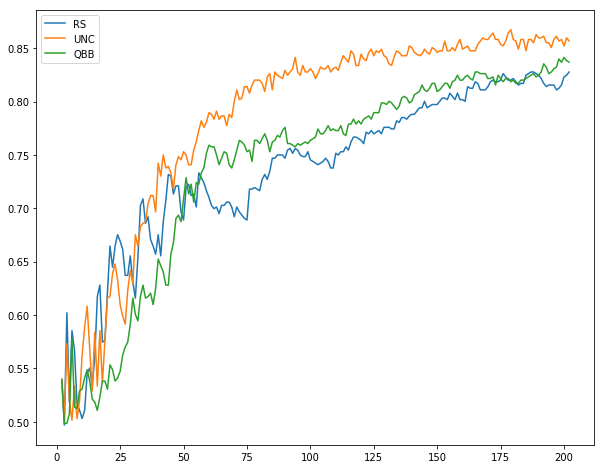

In [79]:
plt.plot(range(len(train_indices), len(rs_tis)+1), rs_accu, label="RS")
plt.plot(range(len(train_indices), len(unc_tis)+1), unc_accu, label="UNC")
plt.plot(range(len(train_indices), len(bag_tis)+1), bag_accu, label="QBB")
plt.legend()